# 고객 추가 구매 유도 방안 수립

## 0. Background

```
●	현재는 2021년, 000님은 가상의 홈쇼핑 기반 온라인 커머스 기업 ‘다잇다'의 데이터 분석가로 해당 서비스의 데이터 분석을 진행하려고 합니다.
●	‘다잇다'의 고객 구매 이력 데이터를 기반으로 고객의 추가 구매 유도를 하기 위한 방안을 수립하고자 합니다. 
●	과제 데이터는 아래와 같이 구성이 되어 있습니다.
●	데이터 스키마
    ○	online_commerce_data.csv : 고객의 인적/구매 이력 정보를 담고 있는 데이터
        ■	customer_no : 고객번호 (고객 식별 값, 보통 고유함)
            ●	고객번호의 앞 여섯 자리는 고객의 가입연월을 의미함 (eg. 2019073300103 고객의 가입연월은 2019-07)
        ■	age : 고객 연령
        ■	gender : 고객 성별 (1 : 남성, 2 : 여성, 9 : 성별 알 수 없음)
        ■	order_no : 주문 번호
        ■	order_date : 주문 일자
        ■	channel : 주문 채널 (TV, Mobile)
        ■	item_category : 아이템 카테고리
        ■	item_code : 아이템 코드
        ■	item_name : 아이템명
        ■	price : 판매가
        ■	qty : 주문 수량
        ■	order_amount : 주문 금액
        ■	discount_amount : 할인 금액
        ■	paid_amount : 고객 결제 금액
```

## 1. Data Preprocessing & Exploratory Data Analysis


```
●	데이터 분석에 필요한 데이터 전처리를 진행해주세요.
●	자유롭게 탐색적 데이터 분석 과정을 통해 다잇다의 고객, 서비스 특성을 파악해주세요.
```

### Import & Read File

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('online_commerce_data.csv')
df

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021/06/07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021/05/31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021/05/13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021/06/17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021/06/02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147306,2021010562805,45.0,9,202106018639694,2021/06/01,TV,건강식품,323492393,유산균,99000,3,297000,17700,279300
147307,2019124982759,40.0,2,202104155934763,2021/04/15,TV,뷰티,321803513,파운데이션,69900,20,1398000,346400,1051600
147308,2019083044089,38.0,2,202104026508012,2021/04/02,Mobile,일반식품,320105539,생수,3360,1,3360,0,3360
147309,2019010788799,67.0,1,202103247950735,2021/03/24,Mobile,일반식품,321742510,커피믹스,23500,1,23500,0,23500


### EDA

In [3]:
#  Data 147,311*14
df.info()
# age null값 확인됨& 혼자 float형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147311 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      147311 non-null  int64  
 1   age              147273 non-null  float64
 2   gender           147311 non-null  int64  
 3   order_no         147311 non-null  int64  
 4   order_date       147311 non-null  object 
 5   channel          147311 non-null  object 
 6   item_category    147311 non-null  object 
 7   item_code        147311 non-null  int64  
 8   item_name        147311 non-null  object 
 9   price            147311 non-null  int64  
 10  qty              147311 non-null  int64  
 11  order_amount     147311 non-null  int64  
 12  discount_amount  147311 non-null  int64  
 13  paid_amount      147311 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 15.7+ MB


In [4]:
# Describe
display(df.describe())
display(df.describe(exclude='number'))
# 숫자 음수 존재하지 않음

,customer_no,age,gender,order_no,item_code,price,qty,order_amount,discount_amount,paid_amount
count,1.473110e+05,147273.000000,147311.000000,1.473110e+05,1.473110e+05,1.473110e+05,147311.000000,1.473110e+05,1.473110e+05,1.473110e+05
mean,2.019382e+12,48.080178,2.916001,2.021040e+14,3.219270e+08,9.059506e+04,1.510118,1.226036e+05,1.183722e+04,1.107664e+05
std,1.170078e+09,12.555535,2.807581,1.516741e+09,1.149283e+06,2.497701e+05,4.954752,3.899782e+05,5.353472e+04,3.532539e+05
min,2.015010e+12,15.000000,1.000000,2.021010e+14,3.200021e+08,1.200000e+02,1.000000,1.500000e+02,0.000000e+00,1.500000e+02
25%,2.018129e+12,38.000000,1.000000,2.021030e+14,3.210435e+08,3.900000e+03,1.000000,3.900000e+03,0.000000e+00,3.900000e+03
50%,2.019122e+12,47.000000,2.000000,2.021041e+14,3.222366e+08,3.090000e+04,1.000000,3.681000e+04,4.900000e+02,3.307000e+04
75%,2.020102e+12,57.000000,2.000000,2.021052e+14,3.226723e+08,6.490000e+04,1.000000,6.990000e+04,3.990000e+03,6.800000e+04
max,2.021070e+12,149.000000,9.000000,2.021062e+14,3.236732e+08,8.334000e+06,260.000000,3.603600e+07,2.017500e+06,3.603600e+07


,order_date,channel,item_category,item_name
count,147311,147311,147311,147311
unique,175,2,21,1185
top,2021/04/20,Mobile,일반식품,생수
freq,4272,84407,69002,39696


In [5]:
# age NaN일 경우 확인
df[df.age.isnull()]
# age NaN 일 경우 gender 9로 나이, 성별 모두 알 수 없음

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
2479,2020042097533,NaN,9,202104014704079,2021/04/01,Mobile,일반식품,321981732,생수,3300,1,3300,0,3300
5977,2020120538186,NaN,9,202102051918006,2021/02/05,Mobile,일반식품,320105541,생수,5990,1,5990,0,5990
14980,2020110634881,NaN,9,202102122693785,2021/02/12,Mobile,일반식품,320105541,생수,6000,1,6000,0,6000
15457,2020042097533,NaN,9,202105011653115,2021/05/01,Mobile,일반식품,321981732,생수,3290,1,3290,0,3290
17504,2021027453851,NaN,9,202102010947124,2021/02/01,TV,일반식품,322547873,레드향세트,45900,1,45900,1000,44900
19449,2020112450611,NaN,9,202104135050983,2021/04/13,Mobile,뷰티,323354139,클렌징,9500,1,9500,1900,7600
26536,2021017055884,NaN,9,202102074293785,2021/02/07,TV,주방용품,322062185,자동회전냄비,109000,1,109000,19900,89100
30855,2021027657719,NaN,9,202102029259913,2021/02/02,Mobile,일반식품,320077263,생수,3900,1,3900,0,3900
35200,2021028999862,NaN,9,202103013140709,2021/03/01,TV,건강식품,321973170,아보카도오일,154000,1,154000,35400,118600
37517,2018036758656,NaN,9,202101189618716,2021/01/18,TV,일반식품,322547725,손질새우,60900,1,60900,7090,53810


In [6]:
# age 결측치 0(알수없음)으로 변경 후 int 64로 변경
df['age'] = df['age'].fillna(0)
df['age'] = df['age'].astype('int64')
df['age'].dtype

dtype('int64')

In [7]:
# order_date datetime으로 type 변경
df['order_date'] = pd.to_datetime(df['order_date'])
print(f" Start Time {df['order_date'].min()}")
print(f" End Time {df['order_date'].max()}")
# 2021-01-01 00:00:00 ~ 2021-06-24 00:00:00

 Start Time 2021-01-01 00:00:00
 End Time 2021-06-24 00:00:00


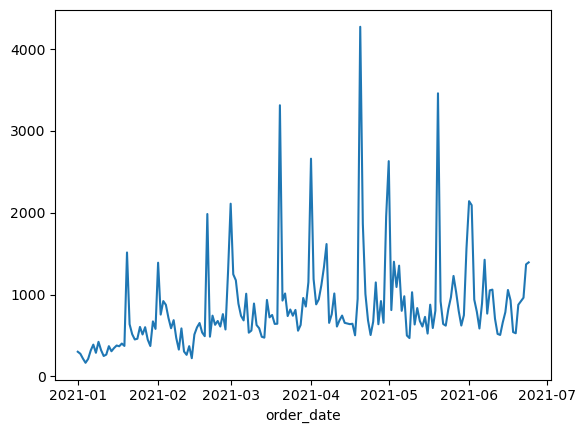

In [8]:
#요일마다 주문건수 비교
daily_total = df.groupby('order_date').size()
sns.lineplot(daily_total)
plt.show()
#월 중후반마다 주문건수가 늘어나는 모습(월급날?)

In [9]:
# 요일 컬럼 추가
df['day'] = df['order_date'].dt.day_name()
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,day
0,2021059651101,68,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,Monday
1,2018069800502,49,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,Monday
2,2019073300103,35,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,Thursday
3,2020075283364,41,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,Thursday
4,2020104780765,46,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,Wednesday


In [10]:
#요일마다 주문건수 비교
df.groupby('day').size().sort_values()
# 수 > 목 > 화 > 월 > 토 > 금 > 일
# 주말보다 평일이 높다

day
Sunday       15824
Friday       17394
Saturday     20540
Monday       22668
Tuesday      22716
Thursday     22909
Wednesday    25260
dtype: int64

In [11]:
# 회원 수 확인
df['customer_no'].nunique()
# 147,311건 회원 수  72,060명

72060

In [12]:
# 주문번호 확인
df['order_no'].nunique()
# 중복되는 주문번호 존재

145021

In [13]:
# 중복된 주문번호 확인
df[df.duplicated('order_no',False)].sort_values('order_no')
# 고객번호 동일하나 아이템 코드가 다름
# -> 한 주문번호에 여러가지 상품이 담겨있다
# -> 모두 중복되는 데이터는 없음. 중복제거 필요 없음.

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,day
142911,2020088567173,59,2,202101018515054,2021-01-01,TV,레포츠패션,322319858,패딩점퍼,89000,1,89000,0,89000,Friday
54627,2020088567173,59,2,202101018515054,2021-01-01,TV,레포츠패션,322319859,패딩점퍼,89000,1,89000,0,89000,Friday
62756,2019037198799,55,2,202101029019985,2021-01-02,TV,레포츠패션,322366127,트레킹화,29800,1,29800,0,29800,Saturday
135591,2019037198799,55,2,202101029019985,2021-01-02,TV,레포츠패션,322366126,트레킹화,29800,1,29800,0,29800,Saturday
27276,2020124813816,70,2,202101029040380,2021-01-02,TV,생활용품,322364231,폴딩선반,145000,1,145000,0,145000,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147153,2018016046022,41,2,202106242003508,2021-06-24,Mobile,일반식품,322545118,기타 반찬류,4900,2,9800,2340,7460,Thursday
27852,2019121740466,39,1,202106242213724,2021-06-24,Mobile,일반식품,321981732,생수,3400,1,3400,0,3400,Thursday
92129,2019121740466,39,1,202106242213724,2021-06-24,Mobile,일반식품,321043461,생수,6650,1,6650,0,6650,Thursday
52229,2020103190269,62,2,202106242231498,2021-06-24,Mobile,주방용품,323173219,양식기,5100,2,10200,0,10200,Thursday


In [14]:
#성별 확인
pd.DataFrame(df['gender'].value_counts()).join(pd.DataFrame(df['gender'].value_counts(1).round(4)*100))
# 여성고객(2)이 더  많다

,count,proportion
gender,,
2,79432,53.92
1,42527,28.87
9,25352,17.21


In [15]:
# 채널 확인
pd.DataFrame(df['channel'].value_counts()).join(pd.DataFrame(df['channel'].value_counts(1).round(4)*100))
# Mobile이 더 많다

,count,proportion
channel,,
Mobile,84407,57.3
TV,62904,42.7


In [16]:
#카테고리 확인
pd.DataFrame(df['item_category'].value_counts()).join(pd.DataFrame(df['item_category'].value_counts(1).round(4)*100))
# 일반식품 높은 비율 차지 46.84%

,count,proportion
item_category,,
일반식품,69002,46.84
레포츠패션,11523,7.82
생활용품,9289,6.31
언더웨어,8946,6.07
건강식품,8889,6.03
패션잡화,6781,4.60
뷰티,5553,3.77
여성의류,5487,3.72
대형가전,5286,3.59


In [17]:
# 상품코드 상위 10개
pd.DataFrame(df['item_code'].value_counts()).join(pd.DataFrame(df['item_code'].value_counts(1).round(4)*100)).merge(df[['item_code','item_name']].drop_duplicates(), on='item_code', how='left').head(10)
# 생수(일반식품)가 대부분 상위권을 기록

,item_code,count,proportion,item_name
0,320105539,18336,12.45,생수
1,321981732,8411,5.71,생수
2,320077263,4873,3.31,생수
3,321935656,3199,2.17,드로즈
4,320105541,2185,1.48,생수
5,323393459,1858,1.26,기초세트
6,322614618,1593,1.08,생수
7,322634110,1119,0.76,티셔츠
8,321993603,958,0.65,생수
9,320036696,938,0.64,핸디형청소기


In [18]:
# 생수 제외 상품코드 상위 10% 확인
pd.DataFrame(df[df['item_name'] != '생수']['item_code'].value_counts()).join(pd.DataFrame(df[df['item_name'] != '생수']['item_code'].value_counts(1).round(4)*100)).merge(df[['item_code','item_name']].drop_duplicates(), on='item_code', how='left').head(10)
# 드로즈,기초세트,티셔츠 순

,item_code,count,proportion,item_name
0,321935656,3199,2.97,드로즈
1,323393459,1858,1.73,기초세트
2,322634110,1119,1.04,티셔츠
3,320036696,938,0.87,핸디형청소기
4,322413868,931,0.87,화장지
5,321089035,860,0.80,건강음료
6,322676477,797,0.74,오메가3
7,322676462,671,0.62,오메가3
8,321279576,651,0.60,루테인
9,320220129,588,0.55,냉장고/냉동고


In [19]:
# 상품명 상위 10개
pd.DataFrame(df['item_name'].value_counts()).join(pd.DataFrame(df['item_name'].value_counts(1).round(4)*100)).head(10)
# item_code(321935656) 드로즈 2.17%였으나 76종류의 드로즈 합하면 2.69%

,count,proportion
item_name,,
생수,39696,26.95
드로즈,3956,2.69
티셔츠,3917,2.66
캐주얼화,3811,2.59
트랙수트,3435,2.33
오메가3,2919,1.98
기타 간편/즉석식품,2419,1.64
황사마스크,2409,1.64
기초세트,2220,1.51


In [20]:
# 생수 제외 상품명 상위 10개
pd.DataFrame(df[df['item_name'] != '생수']['item_name'].value_counts()).join(pd.DataFrame(df[df['item_name'] != '생수']['item_name'].value_counts(1).round(4)*100)).head(10)
# 드로즈, 티셔츠,캐주얼화 순

,count,proportion
item_name,,
드로즈,3956,3.68
티셔츠,3917,3.64
캐주얼화,3811,3.54
트랙수트,3435,3.19
오메가3,2919,2.71
기타 간편/즉석식품,2419,2.25
황사마스크,2409,2.24
기초세트,2220,2.06
화장지,1707,1.59


In [21]:
# 가격 분포 확인
df['price'].describe()
# 120원부터 833만원까지 넓은 범위

count    1.473110e+05
mean     9.059506e+04
std      2.497701e+05
min      1.200000e+02
25%      3.900000e+03
50%      3.090000e+04
75%      6.490000e+04
max      8.334000e+06
Name: price, dtype: float64

In [22]:
# 최대 가격 이상여부 확인
df[df['price'] == df['price'].max()]
# 골드바 1개 구입/ 패션잡화??

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,day
28497,2021029811003,60,9,202104134719919,2021-04-13,Mobile,패션잡화,322635031,골드바/코인,8334000,1,8334000,666720,7667280,Tuesday


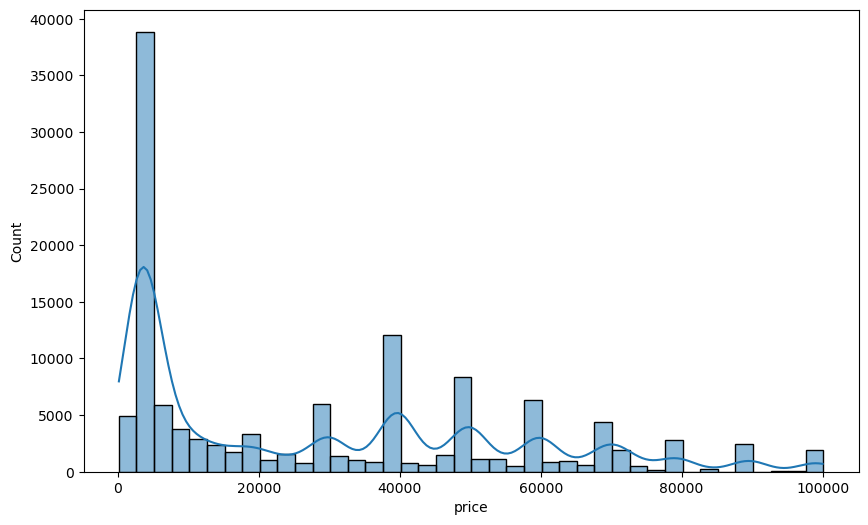

In [23]:
# price boxplot (10만원 이하)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] <= 100000]['price'],binwidth= 2500,kde=True)
plt.show()
# 2500~5000원 금액대가 가장 많은 모습
# 만원 주기로 개수가 늘어나는 모습 (단수 가격 전략)

In [24]:
# 구매 개수 확인
pd.DataFrame(df['qty'].value_counts()).join(pd.DataFrame(df['qty'].value_counts(1).round(4)*100))
# 소량 구매가 대부분을 차지

,count,proportion
qty,,
1,130512,88.60
2,10639,7.22
3,2484,1.69
5,1095,0.74
4,802,0.54
...,...,...
74,1,0.00
42,1,0.00
51,1,0.00


In [25]:
# 주문금액 확인
df['order_amount'].describe()
# 150원부터 3600만원까지

count    1.473110e+05
mean     1.226036e+05
std      3.899782e+05
min      1.500000e+02
25%      3.900000e+03
50%      3.681000e+04
75%      6.990000e+04
max      3.603600e+07
Name: order_amount, dtype: float64

In [26]:
# 최대 주문금액 이상여부 확인
df[df['order_amount'] == df['order_amount'].max()]
# 농충액 260개 구입

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,day
90366,2019123095161,46,2,202104197240465,2021-04-19,Mobile,건강식품,322071419,농축액,138600,260,36036000,0,36036000,Monday


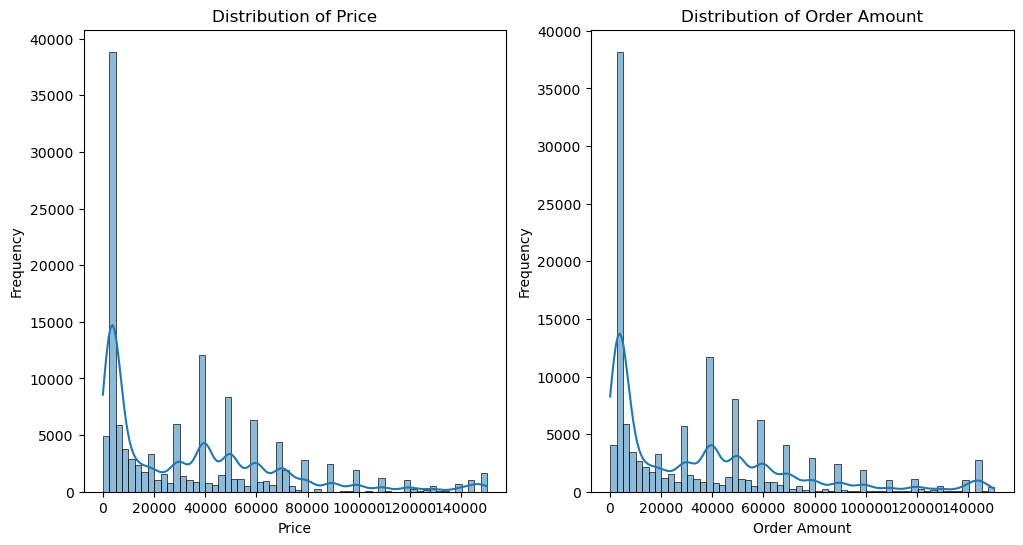

In [27]:
# 가격과 주문금액 비교
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df[df['price'] <= 150000]['price'], binwidth=2500, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(df[df['order_amount'] <= 150000]['order_amount'], binwidth=2500, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Order Amount')
axes[1].set_xlabel('Order Amount')
axes[1].set_ylabel('Frequency')

plt.show()
# 88.6%가 1개씩 구매하였기에 비슷한 양상

In [28]:
# 할인금액 확인
pd.DataFrame(df['discount_amount'].value_counts()).join(pd.DataFrame(df['discount_amount'].value_counts(1).round(4)*100))
# 47.6%가 할인없이 구입

,count,proportion
discount_amount,,
0,70080,47.57
1000,22685,15.40
2000,2637,1.79
27600,1671,1.13
10000,998,0.68
...,...,...
54920,1,0.00
61400,1,0.00
10030,1,0.00


In [29]:
# 할인율 컬럼 추가
df['discount_rate'] = df['discount_amount']/df['order_amount']*100
df['discount_rate'].describe()
#최대 96.6%?? 대부분 10프로 이내 할인

count    147311.000000
mean          4.768586
std           7.481194
min           0.000000
25%           0.000000
50%           1.112347
75%           6.920415
max          96.599327
Name: discount_rate, dtype: float64

In [30]:
# 할인율 최대 값 확인
df[df['discount_rate'] ==df['discount_rate'].max()]
# TV를 통한 핸드폰 구입

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,day,discount_rate
18825,2020102791707,50,1,202101061329987,2021-01-06,TV,생활가전,322105675,핸드폰,297000,1,297000,286900,10100,Wednesday,96.599327
49553,2021016399981,45,9,202101150569867,2021-01-15,TV,생활가전,322105675,핸드폰,297000,1,297000,286900,10100,Friday,96.599327


In [31]:
# 할인율 분포
pd.DataFrame(df['discount_rate'].value_counts()).join(pd.DataFrame(df['discount_rate'].value_counts(1).round(4)*100))

,count,proportion
discount_rate,,
0.000000,70080,47.57
2.506266,3899,2.65
2.004008,3087,2.10
5.000000,3037,2.06
10.000000,2920,1.98
...,...,...
3.999910,1,0.00
18.996764,1,0.00
11.847390,1,0.00


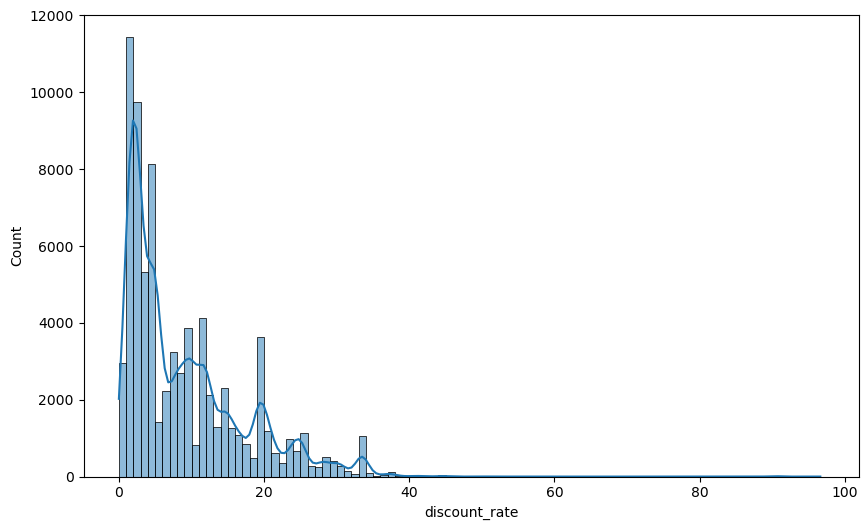

In [32]:
# 할인 적용된 주문들의 할인율 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(df[df['discount_rate'] != 0]['discount_rate'],binwidth=1,kde=True)
plt.show()
# 40%이상 할인은 매우 적음

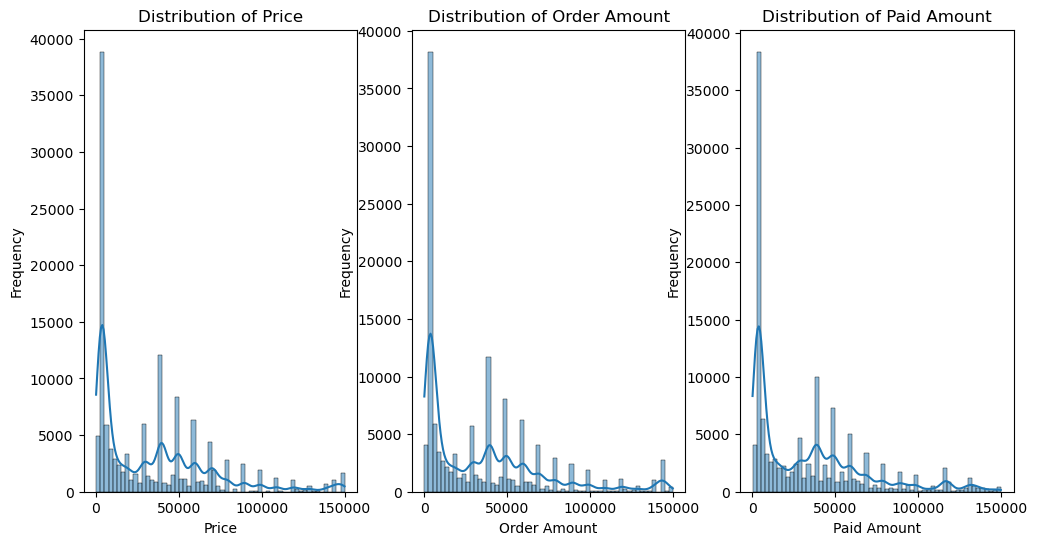

In [33]:
# 결제 금액,가격, 주문금액 비교
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

sns.histplot(df[df['price'] <= 150000]['price'], binwidth=2500, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(df[df['order_amount'] <= 150000]['order_amount'], binwidth=2500, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Order Amount')
axes[1].set_xlabel('Order Amount')
axes[1].set_ylabel('Frequency')

sns.histplot(df[df['paid_amount'] <= 150000]['paid_amount'], binwidth=2500, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Paid Amount')
axes[2].set_xlabel('Paid Amount')
axes[2].set_ylabel('Frequency')

plt.show()
# 88.6%가 1개씩 구매하였기에 비슷한 양상

## 2. Interpretation & Hypothesising

```
●	다잇다의 데이터 분석가로서, 고객의 추가 구매를 유도하기 위한 방안을 제시해주세요.
```

```
주문 건수가 더 많은 모바일 고객 위주로 전략수립
재구매/추가구매율이 낮은 전자제품보다는 높은 의와 주를 통해 추가 구매 증진
-> 의와 주 제품 할인을 통해 '다잇다'에 방문률을 높이는 전략
```

### 채널 비교

In [34]:
# 채널에 따른 비교
print(f"전체 고유고객 {df['customer_no'].nunique()}명")
print(f"Mobile 고유고객 {df[df['channel']== 'Mobile']['customer_no'].nunique()}명")
print(f"TV 고유고객 {df[df['channel']== 'TV']['customer_no'].nunique()}명\n")
print(f"Channel 주문건수 비교\n {pd.DataFrame(df['channel'].value_counts()).join(pd.DataFrame(df['channel'].value_counts(1).round(4)*100))}")
print(f"\nChannel 별 금액 및 개수 비교\n {df.groupby('channel')[['paid_amount','qty']].sum()}")
# Mobile 고객이 더 적지만 금액과 주문건수가 많다
# -> Mobile 고객 위주로 전략 수립

전체 고유고객 72060명
Mobile 고유고객 27364명
TV 고유고객 46355명

Channel 주문건수 비교
          count  proportion
channel                   
Mobile   84407        57.3
TV       62904        42.7

Channel 별 금액 및 개수 비교
          paid_amount     qty
channel                     
Mobile    8643217197  135868
TV        7673884623   86589


In [35]:
# 채널 분리
df_M = df[df['channel'] == 'Mobile'].reset_index(drop=True)
df_T = df[df['channel'] == 'TV'].reset_index(drop=True)
df_M

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,day,discount_rate
0,2020016102337,38,2,202104281179298,2021-04-28,Mobile,일반식품,320105541,생수,5700,2,11400,0,11400,Wednesday,0.0
1,2019097045198,47,2,202102081146588,2021-02-08,Mobile,일반식품,321658904,떡,21000,1,21000,1050,19950,Monday,5.0
2,2019021890482,31,2,202104268188869,2021-04-26,Mobile,일반식품,320105539,생수,3150,1,3150,0,3150,Monday,0.0
3,2019085841643,38,2,202105137706872,2021-05-13,Mobile,대형가전,323032359,노트북,1380000,1,1380000,69000,1311000,Thursday,5.0
4,2018071083135,46,2,202102286391784,2021-02-28,Mobile,일반식품,322614618,생수,3300,1,3300,0,3300,Sunday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84402,2020062761241,56,2,202102222157188,2021-02-22,Mobile,일반식품,321043461,생수,6600,1,6600,0,6600,Monday,0.0
84403,2019012105193,41,2,202105208867287,2021-05-20,Mobile,일반식품,321089035,건강음료,3500,1,3500,0,3500,Thursday,0.0
84404,2019083044089,38,2,202104026508012,2021-04-02,Mobile,일반식품,320105539,생수,3360,1,3360,0,3360,Friday,0.0
84405,2019010788799,67,1,202103247950735,2021-03-24,Mobile,일반식품,321742510,커피믹스,23500,1,23500,0,23500,Wednesday,0.0


#### Mobile EDA

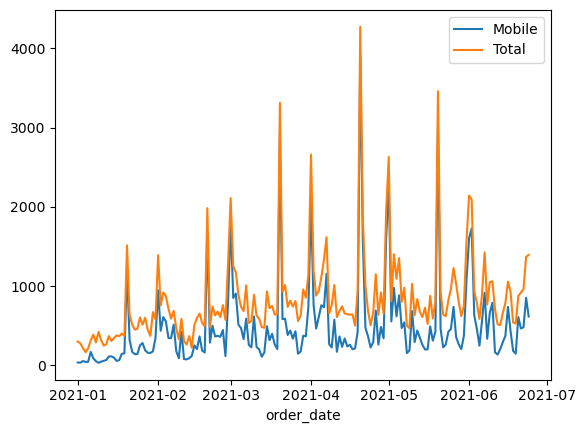

In [36]:
#요일마다 주문건수 비교
daily_total_M = df_M.groupby('order_date').size()
sns.lineplot(daily_total_M,label = 'Mobile')
sns.lineplot(daily_total,label = 'Total')
plt.legend()
plt.show()
# 큰 차이가 없는 모습

In [37]:
#요일마다 주문건수 비교
df_M.groupby('day').size().sort_values()
# 모바일 :수 > 목 > 화 > 월 > 토 > 금 > 일
# 전쳬 : 수 > 월 > 화 > 목 > 토 > 금 > 일
# 월요일과 목요일의 순서가 바뀌었다

day
Sunday        8120
Friday        8377
Saturday     11269
Thursday     13251
Tuesday      13385
Monday       13444
Wednesday    16561
dtype: int64

In [38]:
#성별 확인
pd.DataFrame(df_M['gender'].value_counts()).join(pd.DataFrame(df_M['gender'].value_counts(1).round(4)*100))
# 동일하게 여성고객(2)이 더  많다

,count,proportion
gender,,
2,44139,52.29
1,29239,34.64
9,11029,13.07


In [39]:
#카테고리 확인
pd.DataFrame(df_M['item_category'].value_counts()).join(pd.DataFrame(df_M['item_category'].value_counts(1).round(4)*100))
# 일반식품 전체 대비 상승 46.84% ->68&

,count,proportion
item_category,,
일반식품,57396,68.00
언더웨어,4812,5.70
대형가전,4475,5.30
생활가전,4013,4.75
생활용품,3869,4.58
건강식품,2165,2.56
패션잡화,1387,1.64
키즈/유아동,1082,1.28
주방가전,1081,1.28


In [40]:
# 상품코드 상위 10개
pd.DataFrame(df_M['item_code'].value_counts()).join(pd.DataFrame(df_M['item_code'].value_counts(1).round(4)*100)).merge(df_M[['item_code','item_name']].drop_duplicates(), on='item_code', how='left').head(10)
# 동일하게 생수(일반식품)가 대부분 상위권을 기록

,item_code,count,proportion,item_name
0,320105539,18336,21.72,생수
1,321981732,8411,9.96,생수
2,320077263,4873,5.77,생수
3,321935656,3199,3.79,드로즈
4,320105541,2185,2.59,생수
5,322614618,1593,1.89,생수
6,321993603,958,1.13,생수
7,320036696,938,1.11,핸디형청소기
8,321089035,860,1.02,건강음료
9,321043461,690,0.82,생수


In [41]:
# 생수 제외 상품코드 상위 10% 확인
pd.DataFrame(df_M[df_M['item_name'] != '생수']['item_code'].value_counts()).join(pd.DataFrame(df_M[df_M['item_name'] != '생수']['item_code'].value_counts(1).round(4)*100)).merge(df_M[['item_code','item_name']].drop_duplicates(), on='item_code', how='left').head(10)
# 전체 : 드로즈,기초세트,티셔츠 
# 모바일 : 드로즈 , 해디형청소기, 건강음료
# 드로즈를 제외하고는 순서가 많이 바뀐 모습 -> 모바일은 TV에 비해 제품이 많아 선택되는 상품이 다양하다 판단됨

,item_code,count,proportion,item_name
0,321935656,3199,7.13,드로즈
1,320036696,938,2.09,핸디형청소기
2,321089035,860,1.92,건강음료
3,320220129,588,1.31,냉장고/냉동고
4,321079370,508,1.13,탄산수
5,320978866,498,1.11,모바일 상품권
6,323053792,468,1.04,일반세탁기
7,321071378,453,1.01,탄산수
8,321562966,413,0.92,일반압력밥솥
9,323053812,376,0.84,드럼세탁기


In [42]:
# 상품명 상위 10개
print('Mobile')
display(pd.DataFrame(df_M['item_name'].value_counts()).join(pd.DataFrame(df_M['item_name'].value_counts(1).round(4)*100)).head(10))
print('Total')
display(pd.DataFrame(df['item_name'].value_counts()).join(pd.DataFrame(df['item_name'].value_counts(1).round(4)*100)).head(10))
# 전체와 차이가 확인된다. -> 모바일 : 식 위주 / 전쳬 : 의 위주

Mobile


,count,proportion
item_name,,
생수,39510,46.81
드로즈,3293,3.90
기타 간편/즉석식품,2419,2.87
드럼세탁기,1370,1.62
건강음료,1182,1.40
탄산수,1159,1.37
일반세탁기,1145,1.36
골드바/코인,1098,1.30
냉장고/냉동고,1032,1.22


Total


,count,proportion
item_name,,
생수,39696,26.95
드로즈,3956,2.69
티셔츠,3917,2.66
캐주얼화,3811,2.59
트랙수트,3435,2.33
오메가3,2919,1.98
기타 간편/즉석식품,2419,1.64
황사마스크,2409,1.64
기초세트,2220,1.51


In [43]:
# 구매 개수 확인
pd.DataFrame(df_M['qty'].value_counts()).join(pd.DataFrame(df_M['qty'].value_counts(1).round(4)*100))
# 동일하게 소량 구매가 대부분 차지

,count,proportion
qty,,
1,76555,90.70
2,4638,5.49
3,1249,1.48
4,524,0.62
5,344,0.41
...,...,...
18,1,0.00
72,1,0.00
51,1,0.00


In [44]:
# 할인금액 확인
pd.DataFrame(df_M['discount_amount'].value_counts()).join(pd.DataFrame(df_M['discount_amount'].value_counts(1).round(4)*100))
# 전체 47.6% 대비 할인 없이 구입하는 비율 증가 -> 68.99%

,count,proportion
discount_amount,,
0,58232,68.99
3940,582,0.69
1500,517,0.61
12910,491,0.58
11480,432,0.51
...,...,...
70430,1,0.00
63650,1,0.00
67200,1,0.00


In [45]:
# 할인율 분포
print('모바일')
display(pd.DataFrame(df_M['discount_rate'].value_counts()).join(pd.DataFrame(df_M['discount_rate'].value_counts(1).round(4)*100)).head(10))
print('전체')
display(pd.DataFrame(df['discount_rate'].value_counts()).join(pd.DataFrame(df['discount_rate'].value_counts(1).round(4)*100)).head(10))
# 모바일의 경우 할인율이 깔끔하게 떨어진다 (5,10프로 쿠폰 지급 예상)

모바일


,count,proportion
discount_rate,,
0.000000,58232,68.99
5.000000,2912,3.45
4.000000,1886,2.23
10.000000,1459,1.73
20.000000,1065,1.26
3.000000,631,0.75
20.846561,586,0.69
8.994009,495,0.59
7.997771,438,0.52


전체


,count,proportion
discount_rate,,
0.000000,70080,47.57
2.506266,3899,2.65
2.004008,3087,2.10
5.000000,3037,2.06
10.000000,2920,1.98
2.564103,2108,1.43
1.669449,1940,1.32
4.000000,1886,1.28
19.166667,1716,1.16


In [46]:
# 할인 없이 구입
display(pd.DataFrame(df_M[df_M['discount_rate']==0]['item_name'].value_counts()).head(10))
display(pd.DataFrame(df_M[df_M['discount_rate']==0]['item_category'].value_counts()).head(10))
# 생수 및 일반식품은 할인 없이도 구매율이 높다

,count
item_name,
생수,38300
드로즈,3144
기타 간편/즉석식품,991
건강음료,933
농축액,500
백미(쌀),393
두유,343
커피믹스,312
나시/홈웨어,308


,count
item_category,
일반식품,48414
언더웨어,4178
생활용품,2487
건강식품,932
주방용품,521
여성의류,349
생활가전,269
레포츠패션,242
레저/스포츠,187


In [47]:
# 할인율(<10%)로 산 항목 확인
display(pd.DataFrame(df_M[(df_M['discount_rate']<10)&(df_M['discount_rate']>0)]['item_name'].value_counts()).head(10))
display(pd.DataFrame(df_M[(df_M['discount_rate']<10)&(df_M['discount_rate']>0)]['item_category'].value_counts()).head(10))
# 가전처럼 높은 가격대의 제품의 할인율이 적음.

,count
item_name,
드럼세탁기,1370
일반세탁기,1145
생수,1126
냉장고/냉동고,1032
핸디형청소기,934
LED TV,867
골드바/코인,652
모바일 상품권,539
기타 간편/즉석식품,461


,count
item_category,
일반식품,4970
대형가전,4393
생활가전,3615
패션잡화,741
건강식품,657
상품권,539
생활용품,507
언더웨어,507
주방용품,297


In [48]:
# 할인율(10%<=x<=30%)로 산 항목 확인
display(pd.DataFrame(df_M[(df_M['discount_rate']<=30)&(df_M['discount_rate']>=10)]['item_name'].value_counts()).head(10))
display(pd.DataFrame(df_M[(df_M['discount_rate']<=30)&(df_M['discount_rate']>=10)]['item_category'].value_counts()).head(10))
# 일반식품의 경우 할인율에 상관없이 상위권을 기록중
# 탄산수,이유식,분유,김치 같이 주기적 구입이 필요한 상품들이 랭크인한 모습

,count
item_name,
탄산수,931
기타 간편/즉석식품,588
IH압력밥솥,557
골드바/코인,446
이유식,352
일반압력밥솥,327
분유,325
기타 반찬류,241
주방세제/베이킹소다,240


,count
item_category,
일반식품,3401
주방가전,894
생활용품,853
키즈/유아동,832
뷰티,569
패션잡화,563
건강식품,557
생활가전,129
언더웨어,127


## 결론
```
모바일의 회원들의 구입률이 높음.

일반식품은 할인율 상관없이 잘 팔림.(특히 생수)
대형제품의 경우 약간의 할인으로도 큰 값이 할인 되게에 크지 않은 할인율에도 높은 판매량을 기록.
탄산수,이유식,분유,김치 같은 소비품은 할인율이 크면 미리 구입해두는 것으로 판단됨.
-> 소비품을 주기적으로 할인하여 '다잇다'의 방문율을 높이고, 단수 가격을 통해 추가 구매를 높일 수 있다고 판단됨.
```